____

# Currency Speculation based on Experience / Sentiment

Under Phileas Fogg's wikipedia page, his occupation is listed as "gambler". In fact, the book is the story of a bet Phileas wagers that he can "circumnavigate the world in 80 days or less". It is therefore not unlikely that Phileas would be interested in currency speculation. 

He has been blessed with incredibly long life and is starting a repeat journey on 1st January 2019. He might consider his experiences in each of the places he visited from his first trip around the world and decide to speculate on the currency of each country. We can determine experience by using the sentiment scores from question 14. The logic here is that if a chapter has positive sentiment, it is assumed that Phileas had good experiences while he was in the cities mentioned in that chapter. 

Assumptions:

- Bets are placed at the start of the journey and returns are considered on his return 80 days later
- The cities mentioned in each chapter are examined and the sentiment of that chapter determines whether the trade is to buy or sell that country's currency
- His second journey takes 80 days

### Inital data preparation

The sentiment scores for each chapter have already been calculated from previous questions. The cities Phileas has visited have also already been determined. From the cities, we can determine the countries he visited. 

A dictionary is created with all this information so that it can be used later. The keys for the dictionary are the chapter Roman numerals. Each key has a dictionary objecy as a value, where its keys are the city visited, the country visited, and a boolean value signalling if Phileas experiences in that chapter were positive. 

Some city names belong to more than one country. For example, London is a place in both Canada and the UK. This particular bug is dealt with by manually, but other solutions are possible. For example, a list of countries that we know Phileas did not visit could be created and then used as a filter. 

The `pandas` package is used in a previous question, and we slice a previously defined DataFrame to find the countries we are interested in

### Open the file `aroundTW80Days.txt` and read its contents 

In [1]:
# Reads in the text file 'f' and stores as a string variable 's'
with open('aroundTW80Days.txt') as f:
    s = f.read() 

# String is converted to a list of words, delimited by a space ' '
book_list = s.split(' ') 

print(f'The book contains {len(book_list)} words, before any text cleaning is done')

The book contains 62390 words, before any text cleaning is done


In [2]:
import re

# regex package used to split text on either non-alphanumerics, blanks, or double-hypen
book_list = re.split(r'\W\s+|[^a-zA-Z0-9-]|--', s)

# set returns only unique words
book_set = set(book_list)

print(f'Total words: {len(book_list)}')
print(f'Unique words: {len(book_set)}')

# display(book_set)

Total words: 69719
Unique words: 8065


In [3]:
# Create a string from the 'book_list' elements separated by a space
book_string = ' '.join(book_list)

# Split the string into chapters, splitting on word 'Chapter '
chapter_list = book_string.split('Chapter ') 
print(len(chapter_list))

# Removes publisher information at the end of the last chapter
# to limit chapter's impact in question 12
chapter_list[-1] = chapter_list[-1].split('End of Project Gutenberg')[0]

38


In [4]:
# removes preface by redefining the 'chapter list' variable without element index 0
preface = chapter_list[0]

chapter_list = chapter_list[1:] 
print(len(chapter_list))

# Note: running this cell will cause a chapter to be dropped each time due to 'chapter_list' being redefined
# to exclude first element (the preface). Re-run the cell under question 8 to reset original 'chapter_list'

37


In [5]:
# splits each chapter on delimiter ' ' to create a list of words for each chapter
chap_list_of_list = [ch.replace('  ', ' ').split(' ') for ch in chapter_list] 

print(len(chap_list_of_list))

37


In [6]:
# iterates through the chapters in 'chapter_list' and splits the string
# at the first lowercase letter it finds. The first element of this split 
# list of strings is trimmed and then assigned to 'titles'
titles = [re.split(r'[a-z]', chap)[0][:-2] for chap in chapter_list]
display(titles)

# the same is done to get just the chapter roman numerals
ch_nums = [re.split(' ', chap)[0] for chap in titles]

# display(titles)

['I IN WHICH PHILEAS FOGG AND PASSEPARTOUT ACCEPT EACH OTHER THE ONE AS MASTER THE OTHER AS MAN',
 'II IN WHICH PASSEPARTOUT IS CONVINCED THAT HE HAS AT LAST FOUND HIS IDEAL ',
 'III IN WHICH A CONVERSATION TAKES PLACE WHICH SEEMS LIKELY TO COST PHILEAS FOGG DEAR',
 'IV IN WHICH PHILEAS FOGG ASTOUNDS PASSEPARTOUT HIS SERVANT',
 'V IN WHICH A NEW SPECIES OF FUNDS UNKNOWN TO THE MONEYED MEN APPEARS ON  CHANGE',
 'VI IN WHICH FIX THE DETECTIVE BETRAYS A VERY NATURAL IMPATIENCE',
 'VII WHICH ONCE MORE DEMONSTRATES THE USELESSNESS OF PASSPORTS AS AIDS TO DETECTIVES',
 'VIII IN WHICH PASSEPARTOUT TALKS RATHER MORE PERHAPS THAN IS PRUDENT',
 'IX IN WHICH THE RED SEA AND THE INDIAN OCEAN PROVE PROPITIOUS TO THE DESIGNS OF PHILEAS FOGG',
 'X IN WHICH PASSEPARTOUT IS ONLY TOO GLAD TO GET OFF WITH THE LOSS OF HIS SHOES',
 'XI IN WHICH PHILEAS FOGG SECURES A CURIOUS MEANS OF CONVEYANCE AT A FABULOUS PRICE',
 'XII IN WHICH PHILEAS FOGG AND HIS COMPANIONS VENTURE ACROSS THE INDIAN FORESTS AND WHAT E

### Locations Mentioned in the Book on a Map


In [7]:
# Put your answer: code and comment here

import pandas as pd

omit_cities = ['Victoria','San','Imperial','Come','San Pablo','Queenstown','Young','Lincoln','Forster','Formosa']

headers = ['Country', 'City', 'Latitude', 'Longitude', 'Altitude']

# creates dataframe from the 'cities.txt' file giving it column names 'headers',
# separates data using the ';' delimiter
cities_df = pd.read_csv('cities.txt', sep = ';', index_col = 0, names = headers)
# display(df.loc[df.loc[:, 'City'] == 'Victoria']) # debug: shows there are 7 cities named 'Victoria'

# creates a series from the 'City' column of df and then shortens any cities that
# have the word ' City' at the end of them by removing it
cities = cities_df.loc[:, 'City']
cities = [str(city).split(' City')[0] for city in cities]
cities_df.loc[:, 'City'] = cities

# filters the given list of cities from the series called 'cities' using lambda function
# the function will returns citites that are not in the 'omit_cities' and the filter 
# provides the 
filt_cities = list(filter(lambda city: city not in omit_cities, cities))

# updates 'book_list' so that it contains all uni-gram and bi-gram words in the book
# bi-grams found by consectutively adding each word with the next word in the list using join
bi_grams = [' '.join(book_list[i:i+2]) for i in range(len(book_list) - (2))]
new_book_list = book_list + bi_grams

# creates a list of cities mentioned in the book by iterating through every element
# in 'new_book_list' and populating the new list if a word matches a city defined
# in 'filt_cities'
book_cities = set([city for city in filt_cities if city in new_book_list])

In [8]:
print(f'Number of cities in "cities.txt" file: {len(cities)}')
print(f'Number of cities in filtered "cities.txt" file: {len(filt_cities)}')
print(f'Number of cities found in book: {len(set(book_cities))}')
print(book_cities)

Number of cities in "cities.txt" file: 10567
Number of cities in filtered "cities.txt" file: 10544
Number of cities found in book: 44
{'Omaha', 'Agra', 'Pittsburgh', 'Dublin', 'Reading', 'London', 'Manchester', 'Bordeaux', 'Allahabad', 'Save', 'Birmingham', 'Brindisi', 'Mexico', 'Edinburgh', 'Calais', 'Paris', 'Cochin', 'Benares', 'God', 'Nagasaki', 'Yokohama', 'Jersey', 'Denver', 'Southampton', 'York', 'Patna', 'Most', 'San Francisco', 'Rangoon', 'Shanghai', 'Kansas', 'Surat', 'Athens', 'New York', 'Columbus', 'Liverpool', 'Chicago', 'Calcutta', 'Cardiff', 'Glasgow', 'Fort Wayne', 'Oakland', 'Hamburg', 'Sacramento'}


44 44


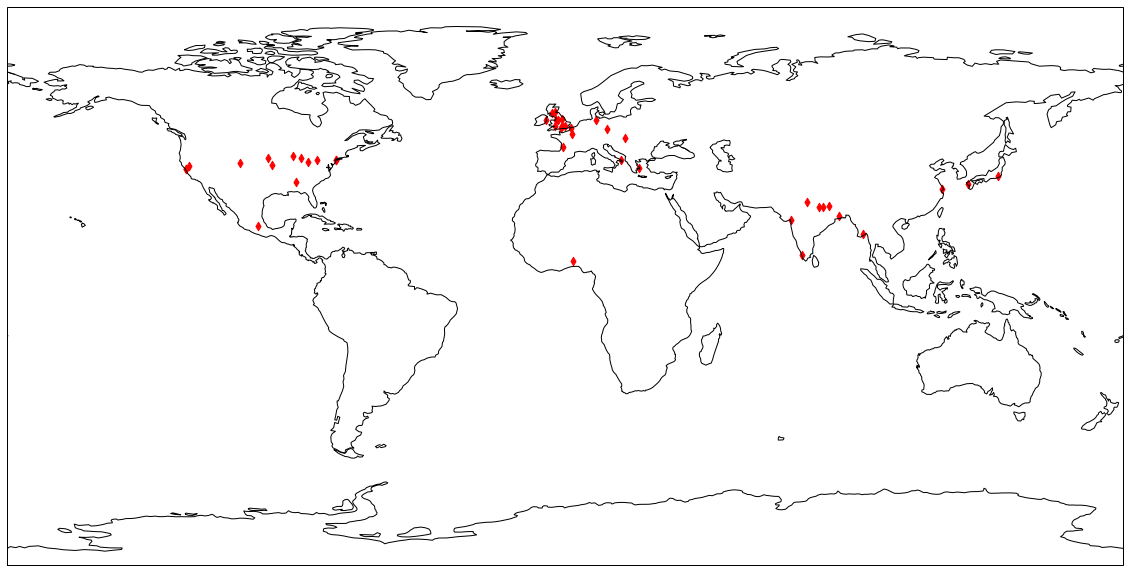

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# assign min/max coordinates to view world map 
ext_x1 = -180
ext_x2 = 180
ext_y1 = -90
ext_y2 = 90

# function that takes equal length lists of x and y coordinates
def plotmap(x, y):
    fig = plt.figure(figsize = (20,12)) # sets figure size
    ax = plt.axes(projection = ccrs.PlateCarree()) # calls cartopy PlateCarree flat world map
    ax.set_extent([ext_x1, ext_x2, ext_y1, ext_y2]) # full map shown from previous assigned variables
    ax.coastlines(resolution = '110m') # resolution of edges where land meets water
    ax.scatter(x, y, marker = 'd', color = 'r', zorder = .5); # plotted cities
    
# assigns longitude(x) and latitude(y) coordinates based on dataframe of 'cities.txt' 
# and puts each x and y into respective lists using comprehension. the city is found in
# the dataframe using row index logic for each iteration and extracts the x's and y's
x = [cities_df.loc[cities_df.loc[:, 'City'] == city, 'Longitude'].values[0] for city in book_cities]
y = [cities_df.loc[cities_df.loc[:, 'City'] == city, 'Latitude'].values[0] for city in book_cities]

# calls function 'plotmap'
plotmap(x, y)

print(len(x), len(y))

### NLTK Sentiment Analysis

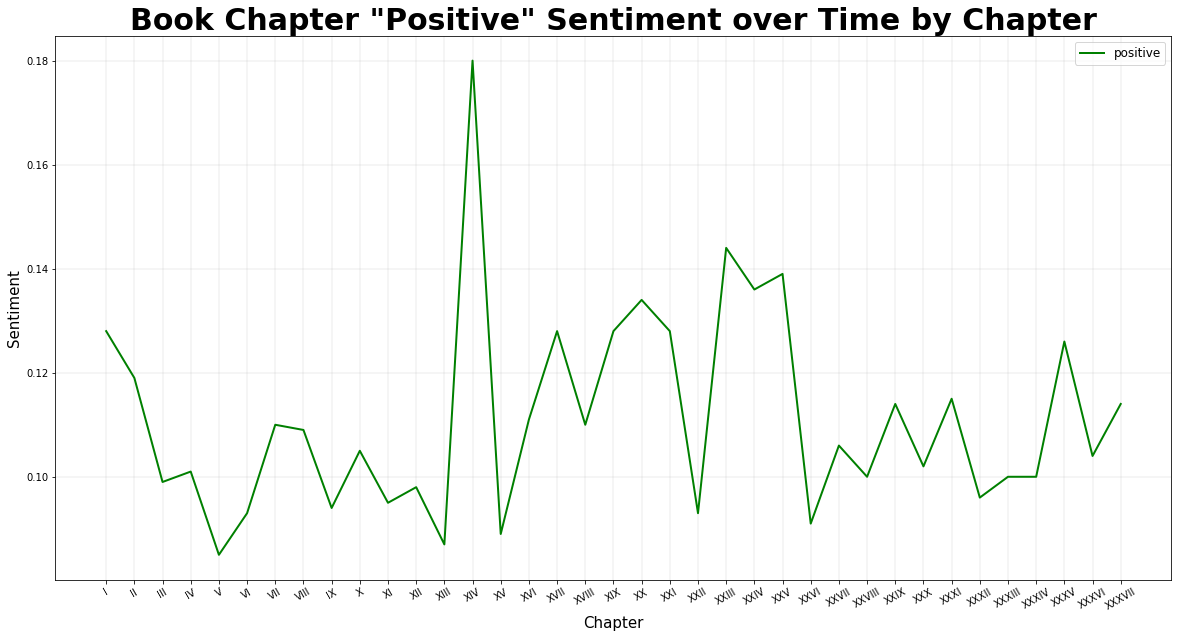

In [11]:
# Put your answer: code and comment here

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

# def sentiment_scores(sentence):
#     score = analyser.polarity_scores(sentence)
# #     print("{:-<40} {}".format(sentence, str(score)))
#     return score

# creates list of sentiment scores based on nltk output for each chapter
# by iterating through each chapter
chapter_scores = [analyser.polarity_scores(chapter) for chapter in chapter_list]

# from above list, sublists created for each of the different fields
# returned by ntlk
pos_scores = [ch['pos'] for ch in chapter_scores]
neg_scores = [ch['neg'] for ch in chapter_scores]
neu_scores = [ch['neu'] for ch in chapter_scores]
com_scores = [ch['compound'] for ch in chapter_scores]

# display(chapter_scores)

plt.figure(figsize = (20, 10))
# plt.plot(com_scores, label = 'compound', color = 'black', lw = 2)
plt.plot(pos_scores, label = 'positive', color = 'green', lw = 2) # positive scores plotted
# plt.plot(neg_scores, label = 'negative', color = 'red', lw = 2)
plt.grid(True, lw = .25) 
plt.title('Book Chapter "Positive" Sentiment over Time by Chapter', fontsize = 30, fontweight = 'bold')
plt.xticks(range(0,len(chapter_list)), ch_nums, rotation = 30) # assigns roman numerals to x axis ticks
plt.xlabel('Chapter', fontsize = 15)
plt.ylabel('Sentiment', fontsize = 15)
# plt.axhline(0, color = 'gray', lw = 2, linestyle = '--')
plt.legend(loc = 'best', fontsize = 12);

In [12]:
# list of true/false if the compound sentiment score from Q14 is positive/negative
sent_polarity = [bool(ch > 0) for ch in com_scores]

# list of tuples for each (city, country) pair in 'cities_df' but only if 
# the city appears in the filt_cities list from Q13
# tuples created by zipping 2 df columns together
filt_cc = cities_df.loc[cities_df.loc[:, 'City'].isin(filt_cities), ['City' ,'Country']]
filt_cc = list(zip(filt_cc.loc[:,'City'].values, filt_cc.loc[:,'Country'].values))

# creates a dictionary with chapter roman numerals as keys and values are the cities and countries 
# visited for each chapter as well as the sentiment for that chapter 
# iterates through chapter lists in 'chap_list_of_list' and then iterates through each word
# in that list to find words that match cities and countrys in 'filt_cc'
ch_count = 0
city_by_chap = {}
for chap in chap_list_of_list:
    city_by_chap[ch_nums[ch_count]] = {
        'city': set([cc[0] for cc in filt_cc if cc[0] in chap]),
        'country': set([cc[1] for cc in filt_cc if cc[0] in chap]), 
        'enjoyed': sent_polarity[ch_count]}
    ch_count += 1

### Acquiring the currency time series data by REST

Free currency exchange rate data is available from https://exchangeratesapi.io with examples on how to acquire the data required. Phileas is travelling the world so we want as many different exchange rates as possible. He is from the UK so we use Pound Sterling (GBP) as the base currency. 

This also means that any mentions of cities that are in the UK will essentially be ignored. Also, cities and countries mentioned in the book for which we do not have a exchange rates for will be ignored.

We need the `requests` package so that we can make the HTTP requests, we need the `json` package so that we can convert the data to a useful dictionary format, and finally we need the `datetime` packages `timedelta` function to determine the the data Phileas will return from the journey

In [13]:
import requests
import json
from datetime import timedelta

# variables for the url are defined as required for the request
s_date = '2018-12-31'
e_date = '2019-06-01'
base = 'GBP'
url = f'https://api.exchangeratesapi.io/history?start_at={s_date}&end_at={e_date}&base={base}'

# requests library queries the api as per above url using 'get' and parses the  
# text output using json package to create a dictionary
response = requests.get(url)
data = response.text
parsed = json.loads(data)

# dataframe for only the 'rates' key of parsed dict is created 
# with the dates as index and ccy codes as column heads by transpose
fx_df = pd.DataFrame(parsed['rates']).T
fx_df.sort_index(inplace = True)
ccy_codes = fx_df.columns

# finds the date 80 days after the start date
journey_e_date = str(pd.Timestamp(fx_df.index[0]).date() + timedelta(80))

# calculates the percentage return for each currency rate over the 80 days
start_prices = fx_df.iloc[0]
end_prices = fx_df.loc[journey_e_date]
returns = end_prices / start_prices - 1

### Acquiring a table with currency codes and country names

The time series data in the previous cell has 3-character currency codes as the column headers. To be able to match a country with a currency code, a table that has both is required. Fortunately, one can be scraped from Wikipedia page https://en.wikipedia.org/wiki/ISO_4217. 

As well as using lecture notes on Web Scraping, I did find the following link very handy for specifically scraping tables: https://scipython.com/blog/scraping-a-wikipedia-table-with-beautiful-soup/.

From `BeautifulSoup` package we import `bs4` to extract the html script from the Wikipedia page we are interested in. We can also use functions such as `find_all` to find the tags relating to the table with currency codes in it. 

`pandas` are used again here to create a new DataFrame filled with data extracted from Wikipedia

In [14]:
from bs4 import BeautifulSoup

# the html for the Wikipedia page is read into BS as a string format
# which was created using requests package
# all tags with 'table' are identified that belong to 'sortable' class
wiki_url = requests.get('https://en.wikipedia.org/wiki/ISO_4217').text
soup = BeautifulSoup(wiki_url, 'html')
tables = soup.find_all('table', class_='sortable')

codes = []
countries = []

# iterates through the tables until it finds the table that has a column header
# 'Locations using this currency' in the 5th column
for table in tables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
    if headings[4] == 'Locations using this currency':
        break

# iterates through the table and searching for 'td' tags which represents
# a row in the table. the values from each column of the table are extracted
# with the 3-character code and country being appended to separate lists
for tr in table.find_all('tr'):
        tds = tr.find_all('td')
        if not tds:
            continue
        code, _, _, _, loc = [td.text.strip() for td in tds[:5]]
        codes.append(code)
        countries.append(loc)

# pandas dataframe is created from the two lists just created
wiki_df = pd.DataFrame({'code': codes, 'countries': countries})

# manual fix, changing the currency code for the United States to USD from USN
wiki_df.loc[wiki_df.loc[:, 'countries'] == 'United States', 'code'] = 'USD'

### Determine the trades Phileas would place

Now that we have sourced all the data we need, a bit of data wrangling is required. The 3-character currency codes from Wikipedia and the city/country data extracted from the book need to be combined. This is so that the time series data for each country's currency can be measured. 

Once the data is ready to be used, the trades that Phileas would make before he leaves on his second 80 day journey are determined. This is done by iterating through each chapter to identify what cities were visited in that chapter and placing a trade for those countries' currencies. If the sentiment in that chapter is positive, an order to buy that currency is placed. If the sentiment in that chapter is negative, an order to sell that currency is placed. 

Each order is for £100 worth of foreign currency and all trades are made at the start of the journey using the prices at the end of the day before. 

Some currency codes could not be linked to a country and vice-versa. For these cities mentioned, no trades in their respective currencies could be placed in this version of the model. 

In [16]:
import numpy as np

# first creating a new df from 'cities_df' filtering only the 'Country' and 'City' columns
city_country_df = cities_df.loc[:, ['Country', 'City']]
# then merging it with the 'wiki_df' to get city, country and code all in the same df
# using an left join to get all data to keep all data in 'city_country_df'
merged_df = pd.merge(city_country_df, wiki_df, how = 'left', left_on = 'Country', right_on = 'countries')

# a list of countries using the Euro is created, as 'wiki_df' shows the long list of countries
# using the Euro as a single string, so the string is split and then any extra characters are 
# removed to give just the country on its own
eur_countries = wiki_df.loc[wiki_df.loc[:, 'code'] == 'EUR', 'countries'].values[0].split(', \xa0')
eur_countries = set([country.split(' (')[0] for country in eur_countries])

ccy_trades = {}

# loops through each chapter key of dictionary previously created
for chap in city_by_chap:
    # loops through each of the country names in that dictionary
    for country in city_by_chap[chap]['country']:
        # logic to determine the country 3-char code
        if country in eur_countries:
            code = 'EUR'
        elif country == 'Canada': # manual fix where London, Canada is mistaken for London, England
            code = np.NaN
        else: # finds the code in the 'merged_df' based on the country name in the same df
            code = list(merged_df.loc[merged_df.loc[:, 'Country'] == country, 'code'])[0]
        # logic to determine if the sentiment was positive or negative
        # which determines whether the trade will be a purchase or sale
        if city_by_chap[chap]['enjoyed']:
            sign = 1
        else:
            sign = -1
        # either creates new dictionary key or adds to existing key  a +/- £100
        # trade of that foreign currency
        if code not in ccy_trades:
            ccy_trades[code] = 100 * sign
        else:
            ccy_trades[code] += 100 * sign     
            
print(ccy_trades)

{nan: 4300, 'EUR': 1300, 'JPY': 900, 'USD': 400, 'HUF': 100, 'MMK': 300, 'CNY': 300, 'MXN': 100}


### Results

The performance of the model can be evaluated by:
- finding the initial portfolio value per currency 
- finding the £ return by multiplying each currency position size by the 80-day price return previously calculated and stored in `returns`
- finding the final portfolio value by adding the returns to the initial value for each currency position

The totals can be found by summing each of the above. From here the total portfolio returns can be found by dividing the `total_portfolio_returns` by the `total_initial_portfolio`

In [17]:
# loops through the 'ccy_trades' dict finds only the currency codes that were used in the model
traded_ccy = [ccy for ccy in ccy_trades if ccy in ccy_codes]

# loops through the 'ccy_trades' dict finds initial ccy positions
initial_portfolio = [ccy_trades[ccy] for ccy in ccy_trades if ccy in ccy_codes]
total_initial_portfolio = sum(initial_portfolio)

# loops through the 'ccy_trades' dict finds initial ccy positions and multiplies by that ccy's return
portfolio_returns = [ccy_trades[ccy] * returns[ccy] for ccy in ccy_trades if ccy in ccy_codes]
total_portfolio_returns = sum(portfolio_returns)

# adds initial values to the returns by adding element-wise in two lists
end_portfolio = [sum(ccy) for ccy in zip(initial_portfolio, portfolio_returns)]
total_end_portfolio = sum(end_portfolio)

# returns over 80 days calculated, and then an apr is found - assuming 252 trading days per year
overall_portfolio_return = total_portfolio_returns / total_initial_portfolio
annualised_return = ((1 + overall_portfolio_return) ** (252 / 80) - 1)

print(f'The initial portfolio value was £{total_initial_portfolio}')
print(f'The ending portfolio value was £{round(total_end_portfolio, 2)}')
print(f'The total portfolio return was £{round(total_portfolio_returns, 2)}')
print(f'The percentage portfolio return was {round(overall_portfolio_return * 100, 2)}% over 80 calender days')
print(f'The annualised portfolio return was {round(annualised_return * 100, 2)}% assuming 252 trading days p.a.')

The initial portfolio value was £3100
The ending portfolio value was £3181.54
The total portfolio return was £81.54
The percentage portfolio return was 2.63% over 80 calender days
The annualised portfolio return was 8.52% assuming 252 trading days p.a.


### Charts

Visualisation also helps to understand what currencies performed best. First, the individual exchange rate returns can be compared and its possible to see the Euro and Japanese Yen positions returned over 3%, while the Chinese Yuan and Mexican Peso positions had negative returns.

The horizontal bar charts show how each position performed in both % terms and also in actual £ terms based on the size of each position. We can see that although the Mexican Peso was the worst performer and returned -1.6% over the 80 day positon, it was only a small £100 position so the actual £ value loss was not as bad. Similarly, the Euro did not perform as well as the JPY in %age terms, but due to the larger initial holding of Euros, it was the currency that provided the largest amount of monetary £ returns.

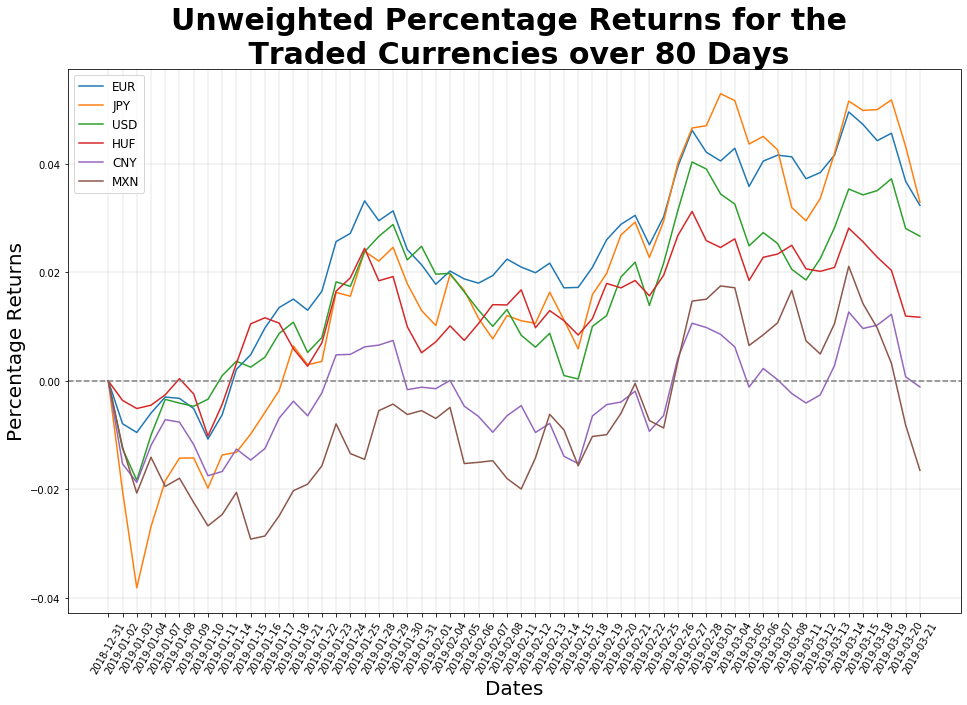

In [18]:
# na's are filled with zero - most importantly the very first row becomes 0
fx_ret_df = fx_df.pct_change().fillna(0)

plt.figure(figsize = (16, 10))
# loops through of the traded currencies and plots their exchange rate returns
for ccy in traded_ccy:
    plt.plot(np.cumprod(1 + fx_ret_df.loc[s_date:journey_e_date, ccy]) - 1, label = ccy)
plt.legend(loc = 'best', fontsize = 12)
plt.title('Unweighted Percentage Returns for the \n Traded Currencies over 80 Days', 
          fontsize = 30, fontweight = 'bold')
plt.ylabel('Percentage Returns', fontsize = 20)
plt.xlabel('Dates', fontsize = 20)
# helps to highlight currencies that were negative over the 80 days
plt.axhline(0, linestyle = '--', color = 'gray')
plt.grid(True, lw = .3)
plt.xticks(rotation = 60);

,initial position,returns,% returns
EUR,1300,42.053087,0.032349
JPY,900,29.630465,0.032923
USD,400,10.667343,0.026668
HUF,100,1.173243,0.011732
CNY,300,-0.335641,-0.001119
MXN,100,-1.648264,-0.016483


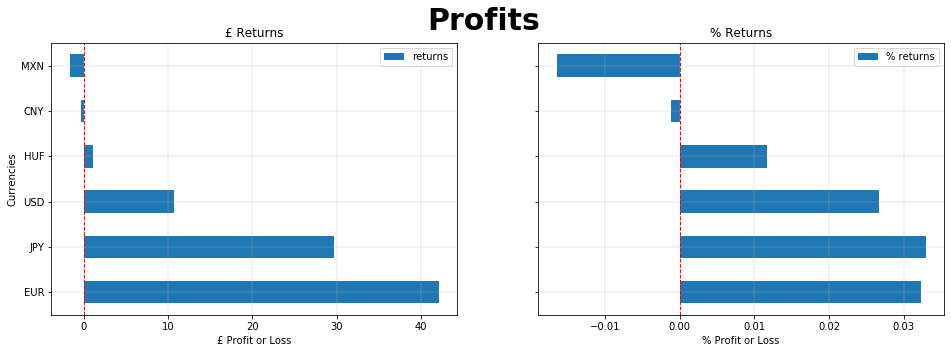

In [19]:
# returns per position are calculated (patially to check mataches previously defined 'returns' values)
# display(returns[traded_ccy])
perc_rets = np.array(portfolio_returns) / np.array(initial_portfolio)
# new 'returns_df' created to plot using 'pandas' plot method
returns_df = pd.DataFrame({'initial position': initial_portfolio,
                           'returns': portfolio_returns, 
                           '% returns': perc_rets}, 
                           index = traded_ccy)

# 1 by 2 figure is drawn with both plots sharing the same y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (16, 5))

# 'returns' is the column identified to be mesaured for the first plot
returns_df.plot(kind = 'barh', y = 'returns', ax = ax1)
ax1.set(title = '£ Returns', xlabel = '£ Profit or Loss', ylabel = 'Currencies')
ax1.axvline(0, color = 'red', linestyle = '--', linewidth = 1) # highlights negatives
ax1.grid(True, lw = .3)

# '% returns' is the column identified to be mesaured for the second plot
returns_df.plot(kind = 'barh', y = '% returns', ax = ax2)
ax2.set(title = '% Returns', xlabel = '% Profit or Loss', ylabel = '')
ax2.axvline(0, color = 'red', linestyle = '--', linewidth = 1) # highlights negatives
ax2.grid(True, lw = .3)

fig.suptitle('Profits', fontsize = 30, fontweight = 'bold');

display(returns_df)